In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import missingno as msno
import ast

In [3]:
# Load data
coin_data = pd.read_csv('./files/clean_coins.csv')
coin_data

,id,block_time_in_minutes,hashing_algorithm,categories,genesis_date,developer_score,community_score,liquidity_score,description,homepage_link,...,all_time_high(usd),all_time_high_date,market_cap,current_price,price_change_percentage_1y,price_change_percentage_30d,price_change_percentage_7d,headers,descriptions,urls
0,aaa-coin,2.0,Scrypt,['Cryptocurrency'],NaN,0.000,6.932,0.00,Speculative PoW / PoS altcoin with CPU mining ...,['http://www.aaacoin.us/'],...,0.000232,2021-08-13T16:50:09.319Z,0.000000e+00,1.225900e-04,199.09866,42.79439,91.94507,NaN,NaN,NaN
1,aang-inu,0.0,NaN,NaN,NaN,0.000,0.000,0.00,NaN,['https://www.aanginuerc.com'],...,0.000002,2021-10-27T11:48:50.037Z,0.000000e+00,4.626740e-07,0.00000,0.00000,0.00000,NaN,NaN,NaN
2,aapl,0.0,NaN,NaN,NaN,0.000,8.333,0.00,"Applescash = YFI + Ampleforth, $AAPL is going ...",['https://www.applescash.com/'],...,78.750000,2020-09-06T00:00:49.729Z,0.000000e+00,3.390840e-01,-93.84843,0.00000,0.00000,"[""Bitcoin's Performance in the Past Decade Was...",['Bitcoin (BTC) has not only made history as t...,['https://coinmarketcap.com/headlines/news/Bit...
3,aave,0.0,NaN,"['Polygon Ecosystem', 'Near Protocol Ecosystem...",NaN,48.806,40.136,60.55,Aave is a decentralized money market protocol ...,['https://app.aave.com/?referral=93'],...,661.690000,2021-05-18T21:19:59.514Z,4.473907e+09,3.381400e+02,869.44154,23.47592,6.70486,['Andre Cronje Suggests Aave Has a Major Vulne...,['Aave and Yearn Finance community members are...,['https://cryptobriefing.com/andre-cronje-sugg...
4,aave-aave,0.0,NaN,['Aave Tokens'],NaN,0.000,11.443,1.00,NaN,['https://aave.com/'],...,443.400000,2021-08-17T12:17:43.687Z,0.000000e+00,3.447900e+02,0.00000,21.46304,9.13740,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,zzz-finance,0.0,NaN,['Yield Farming'],NaN,0.000,7.387,0.00,ZZZ is a counter to the a YFI clone OWO. ZZZ a...,['https://zzz.finance/'],...,1192.400000,2020-08-24T03:42:45.784Z,8.452070e+03,7.251740e-01,-99.21458,0.00000,0.00000,NaN,NaN,NaN
9575,gaia-everworld,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Polygon-based Multi-Region Fantasy Game Gaia...,NaN,['https://cryptobriefing.com/polygon-fantasy-g...
9576,gamerse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""Warren Buffett Is One of Bitcoin's Biggest C...",['The granddaughter of legendary investor and ...,['https://dailyhodl.com/2021/09/26/warren-buff...
9577,pontoon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Hot Cross Unveils First-Ever Offering: Ponto...,"[""With whitelisting already underway, you'll h...",['https://www.bsc.news/post/hot-cross-unveils-...


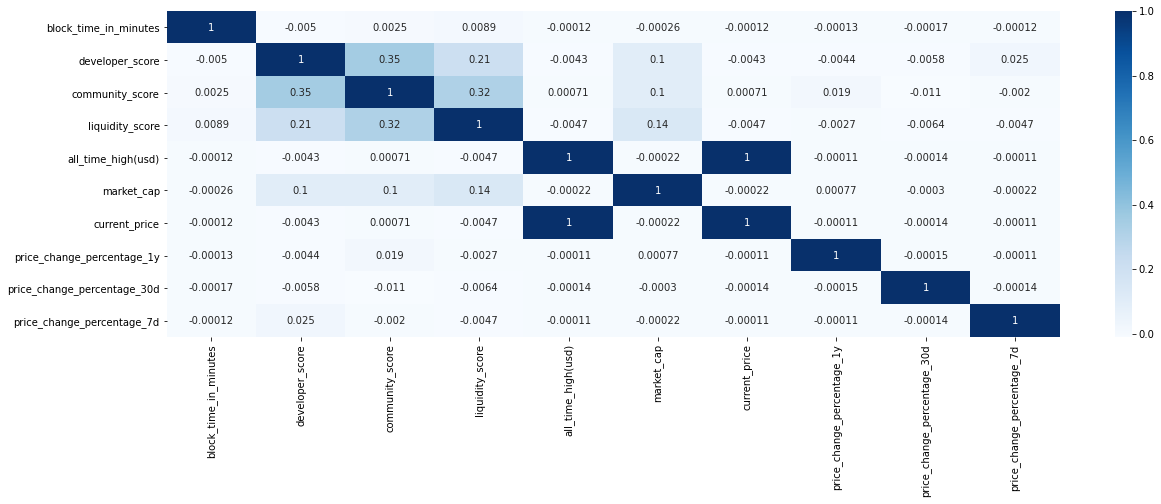

In [3]:
# Heatmap
plt.figure(figsize=(20,6))
coin_matrix = coin_data.corr()
sb.heatmap(coin_matrix, annot=True, cmap='Blues')
plt.savefig('stats/heatmap.png')

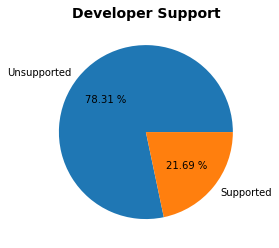

In [4]:
# Support by the coin developers
unsupported = coin_data.loc[coin_data.developer_score == 0.0].count()[0]
supported = coin_data.loc[coin_data.developer_score != 0.0].count()[0]

labels = ['Unsupported', 'Supported']
plt.title('Developer Support', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.pie([unsupported, supported], labels = labels, autopct='%.2f %%')
plt.savefig('stats/developer_support.png')

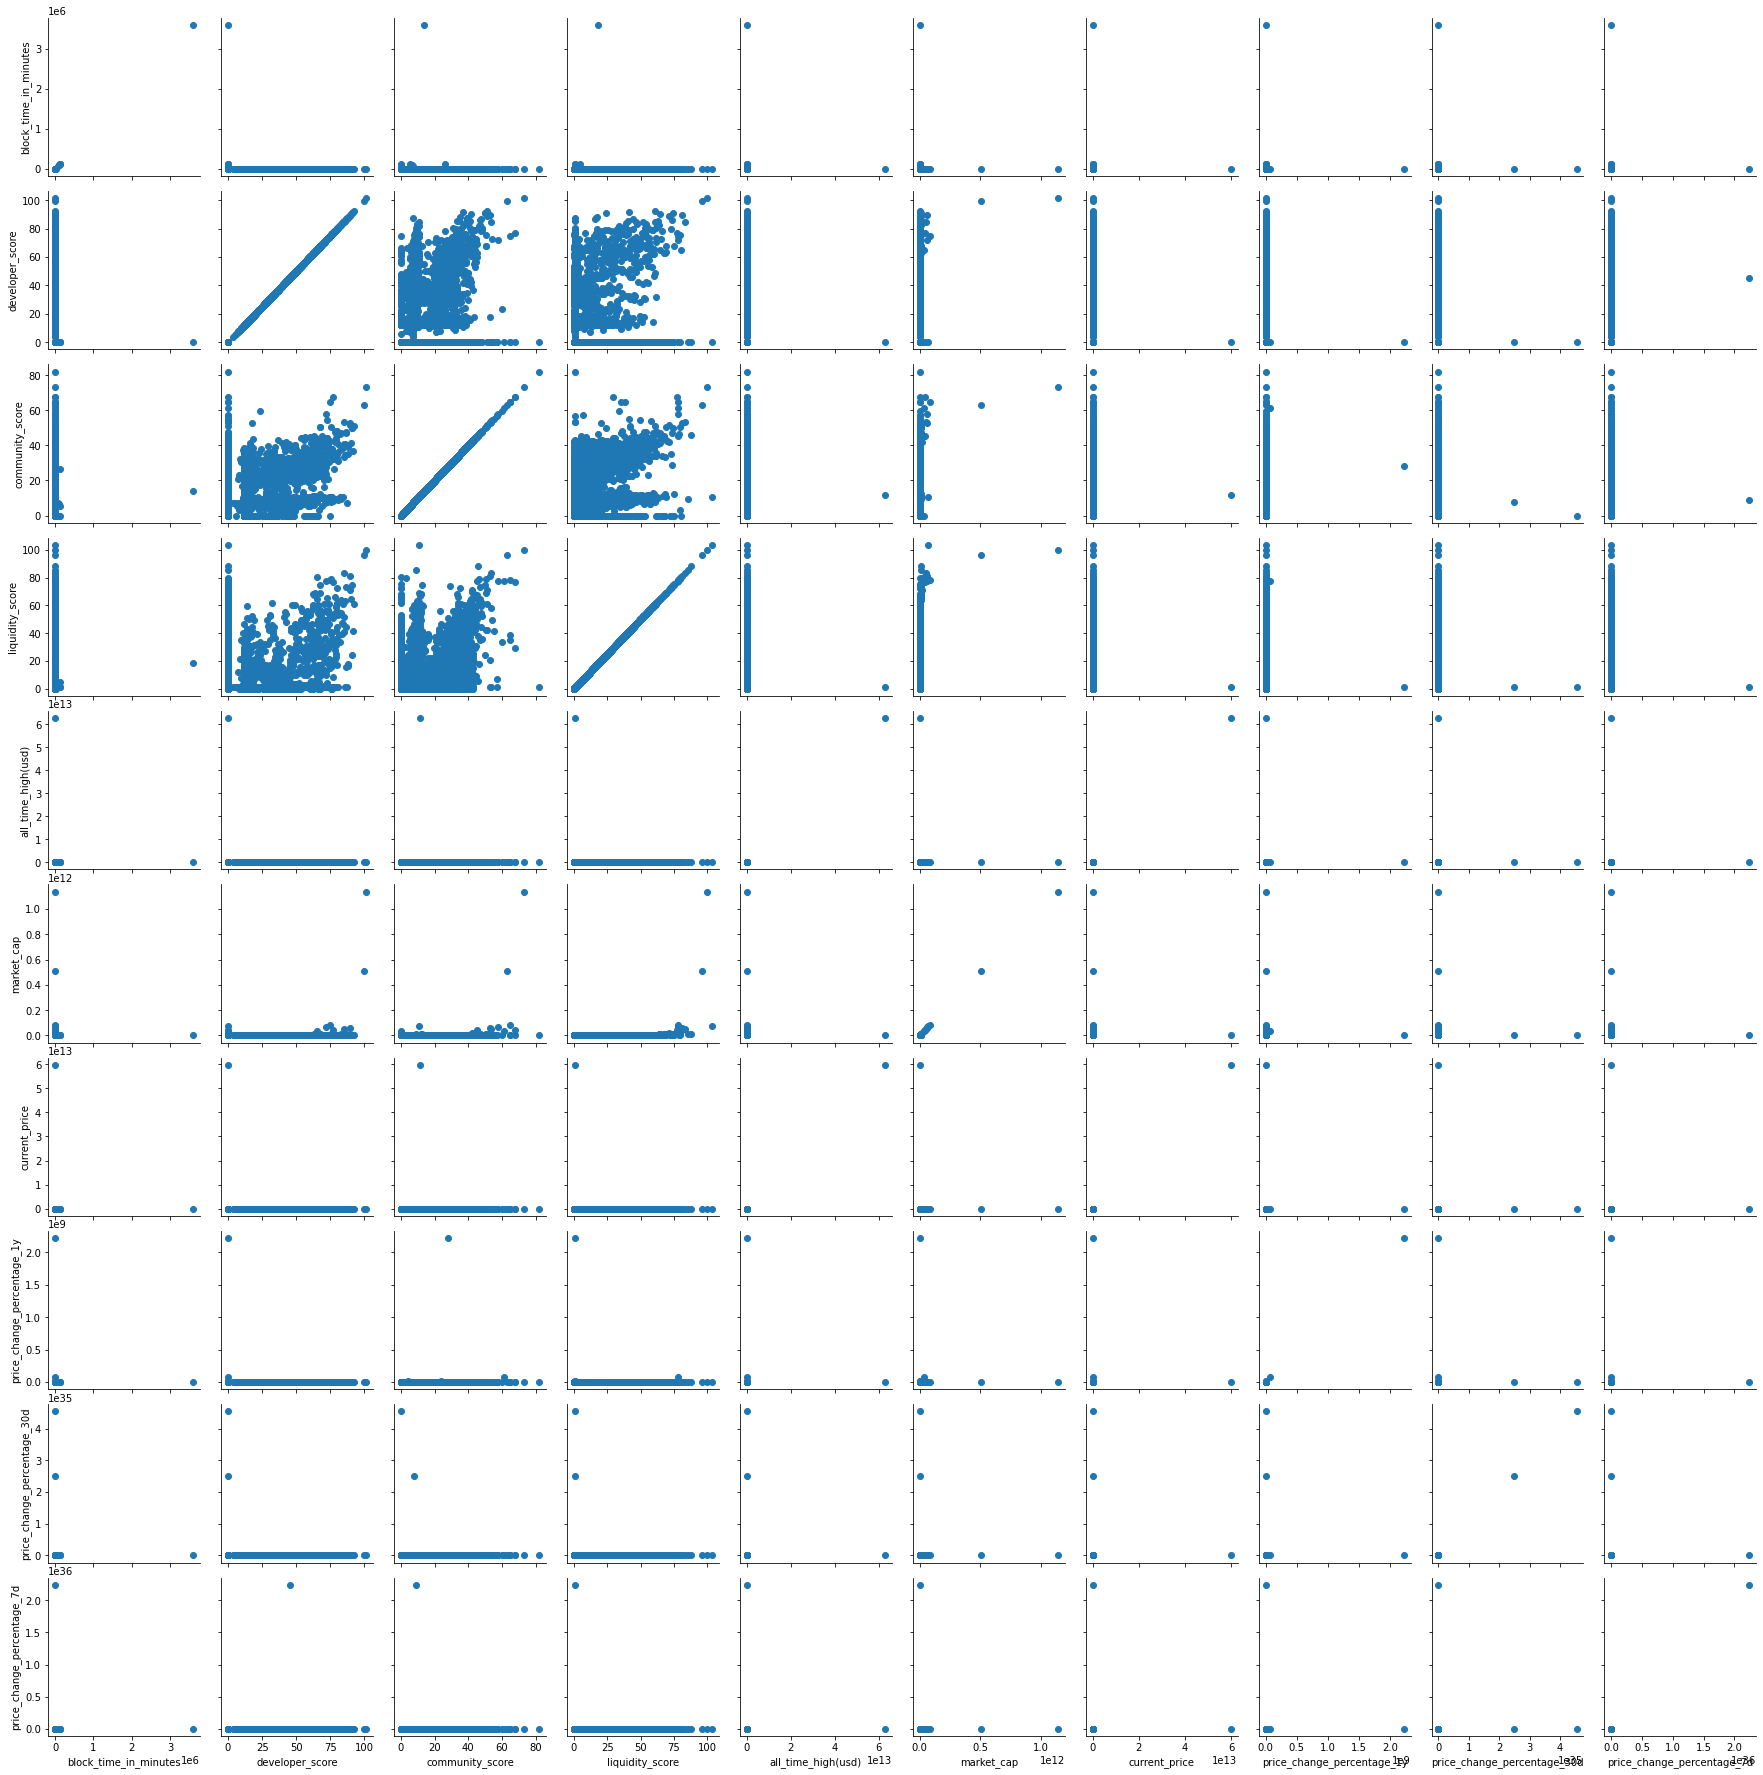

In [5]:
# Pair Grid
coins_g = sb.PairGrid(coin_data)
coins_g.map(plt.scatter)
plt.savefig('stats/pair_grid.png')

In [6]:
# Miscellaneous

# Number of algorithms used
print(f"There are {len(pd.unique(coin_data['hashing_algorithm']))} different algorithms.")
coin_data.describe()

There are 49 different algorithms.


,block_time_in_minutes,developer_score,community_score,liquidity_score,all_time_high(usd),market_cap,current_price,price_change_percentage_1y,price_change_percentage_30d,price_change_percentage_7d
count,9.575000e+03,9575.000000,9575.000000,9575.000000,9.472000e+03,9.472000e+03,9.468000e+03,9.574000e+03,9.574000e+03,9.574000e+03
mean,4.431838e+02,6.520668,10.704781,6.680543,6.620971e+09,2.813193e+08,6.305211e+09,2.421766e+05,7.346991e+31,2.343456e+32
std,3.688527e+04,15.698913,10.194014,12.404688,6.443329e+11,1.292464e+10,6.134769e+11,2.266095e+07,5.294109e+33,2.292997e+34
min,-2.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02
25%,0.000000e+00,0.000000,5.374500,1.000000,1.874132e-02,0.000000e+00,4.876075e-04,0.000000e+00,-3.762818e+00,-1.095434e+01
50%,0.000000e+00,0.000000,8.045000,1.000000,4.056715e-01,0.000000e+00,2.295209e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000,10.635000,6.194500,4.720000e+00,4.938710e+05,5.261855e-01,0.000000e+00,3.262985e+01,3.456510e+00
max,3.600000e+06,101.306000,82.085000,103.466000,6.270919e+13,1.137916e+12,5.969354e+13,2.215909e+09,4.541050e+35,2.243624e+36


In [7]:
# Statistics about categorical data except for scores
coin_data_no_categorical = coin_data[['block_time_in_minutes', 'developer_score', 'community_score', 'liquidity_score', 'all_time_high(usd)', 'market_cap', 'current_price', 'price_change_percentage_1y', 'price_change_percentage_30d', 'price_change_percentage_7d']]
no_categorical_no_scores = coin_data_no_categorical[['block_time_in_minutes', 'all_time_high(usd)', 'market_cap', 'current_price', 'price_change_percentage_1y', 'price_change_percentage_30d', 'price_change_percentage_7d']]
no_categorical_no_scores.describe()

,block_time_in_minutes,all_time_high(usd),market_cap,current_price,price_change_percentage_1y,price_change_percentage_30d,price_change_percentage_7d
count,9.575000e+03,9.472000e+03,9.472000e+03,9.468000e+03,9.574000e+03,9.574000e+03,9.574000e+03
mean,4.431838e+02,6.620971e+09,2.813193e+08,6.305211e+09,2.421766e+05,7.346991e+31,2.343456e+32
std,3.688527e+04,6.443329e+11,1.292464e+10,6.134769e+11,2.266095e+07,5.294109e+33,2.292997e+34
min,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02
25%,0.000000e+00,1.874132e-02,0.000000e+00,4.876075e-04,0.000000e+00,-3.762818e+00,-1.095434e+01
50%,0.000000e+00,4.056715e-01,0.000000e+00,2.295209e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,4.720000e+00,4.938710e+05,5.261855e-01,0.000000e+00,3.262985e+01,3.456510e+00
max,3.600000e+06,6.270919e+13,1.137916e+12,5.969354e+13,2.215909e+09,4.541050e+35,2.243624e+36


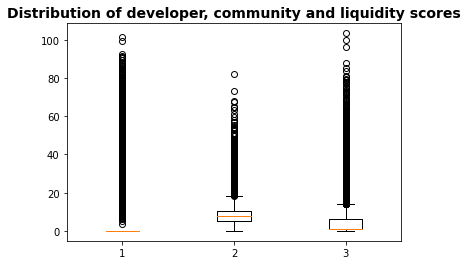

In [8]:
# Box plots (scores)
coin = pd.read_csv("files/coins.csv")

scores = coin[['developer_score', 'community_score', 'liquidity_score']]

plt.title('Distribution of developer, community and liquidity scores', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.boxplot(scores)
plt.savefig('stats/scores_box_plot.png')

The youngest coin was created in 2021-3-18 and the oldest was created in 2009-1-3.


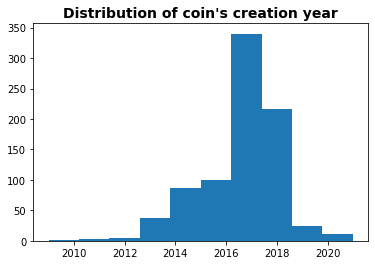

In [9]:
# Processing dates
timestamps = [pd.to_datetime(date, format='%Y-%m-%d', errors='coerce') for date in coin_data['genesis_date']]
# Removing invalid dates
filtered_timestamps = list(filter(lambda x: pd.isnull(x) == False, timestamps))
# Oldest and newest dates
newest = max(filtered_timestamps)
oldest = min(filtered_timestamps)

# Getting years
years = [date.year for date in filtered_timestamps]

plt.title('Distribution of coin\'s creation year', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(years)
plt.savefig('stats/year_dist.png')

print(f"The youngest coin was created in {newest.year}-{newest.month}-{newest.day} and the oldest was created in {oldest.year}-{oldest.month}-{oldest.day}.")

# Analysing missing values

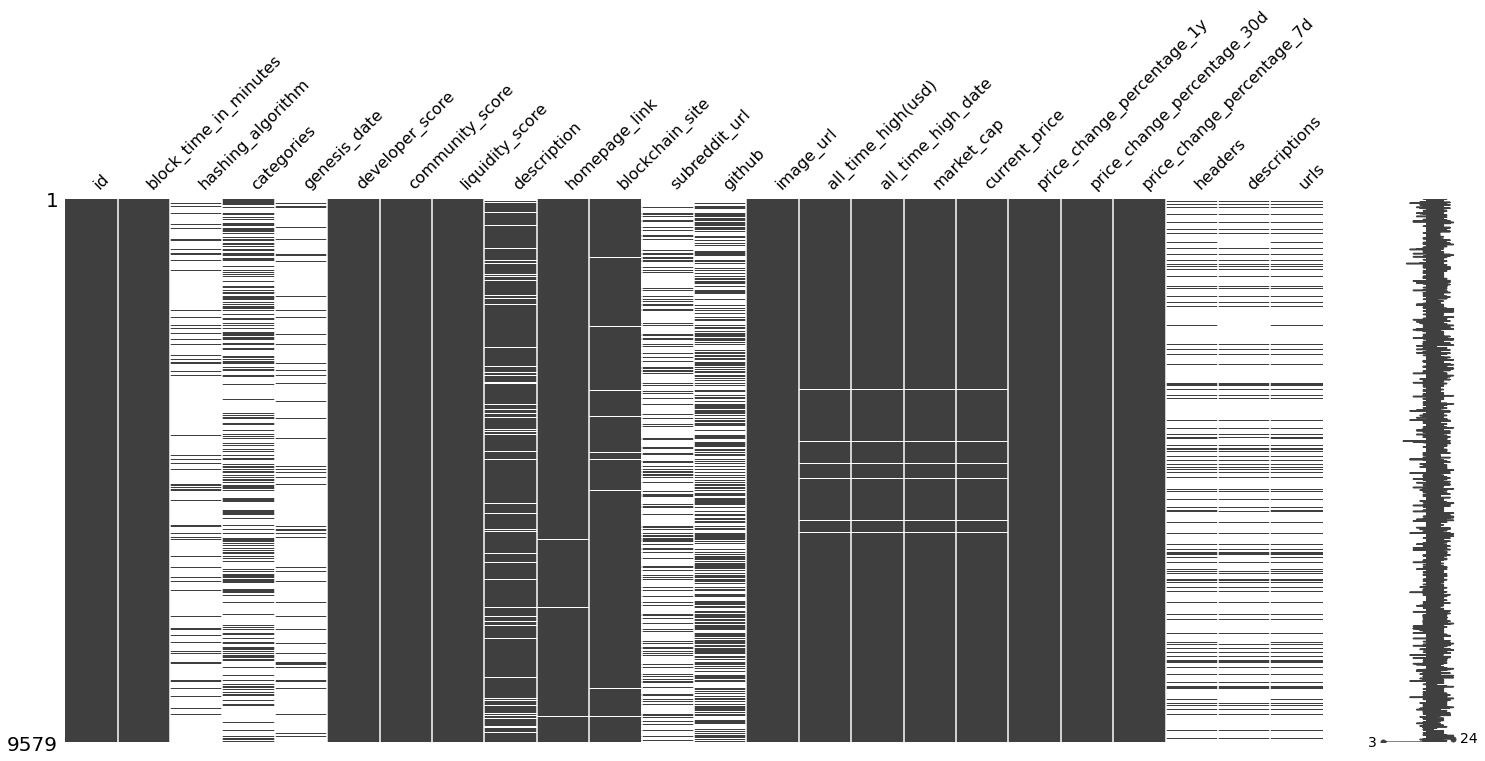

In [10]:
fig = msno.matrix(coin_data)
fig_copy = fig.get_figure()
fig_copy.savefig('stats/missing_values_matrix.png')

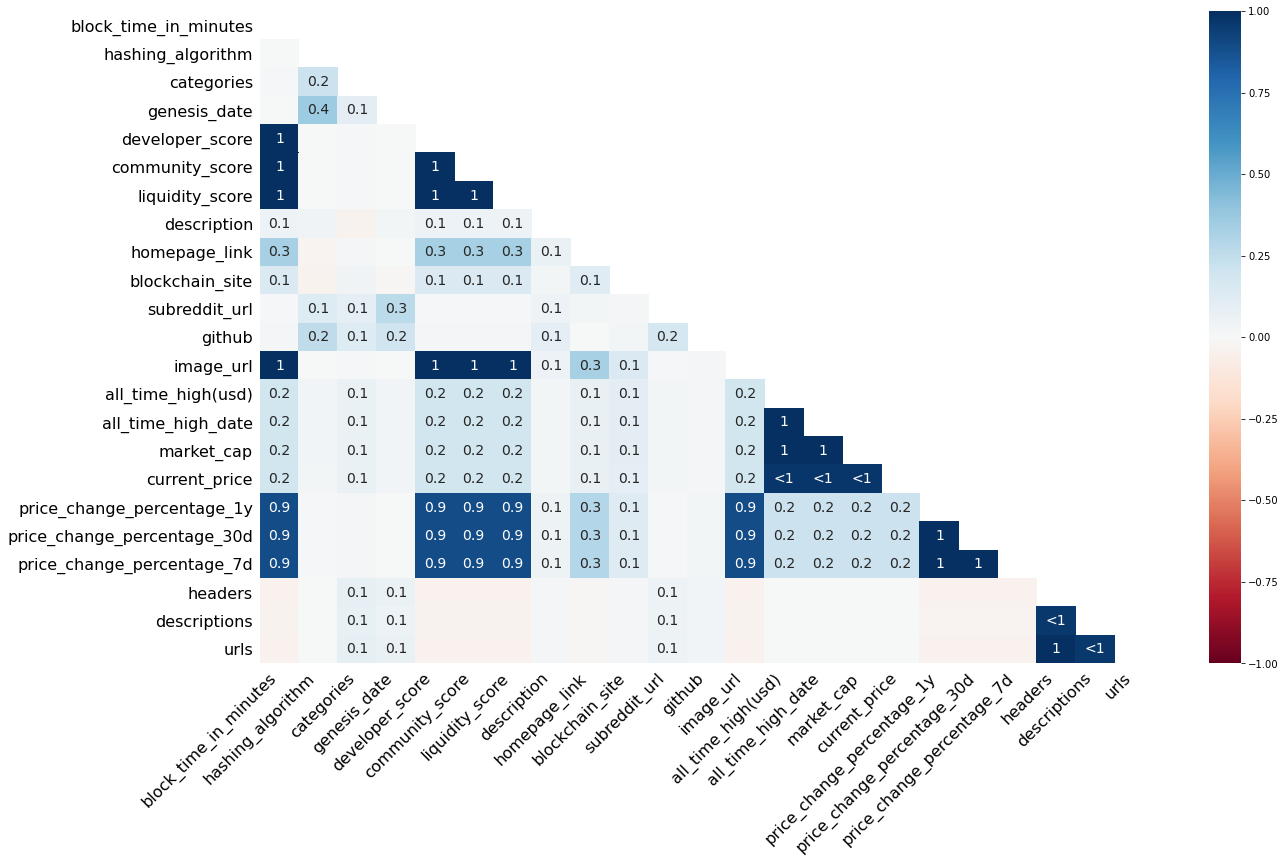

In [11]:
fig = msno.heatmap(coin_data)
fig_copy = fig.get_figure()
fig_copy.savefig('stats/missing_values_heatmap.png')

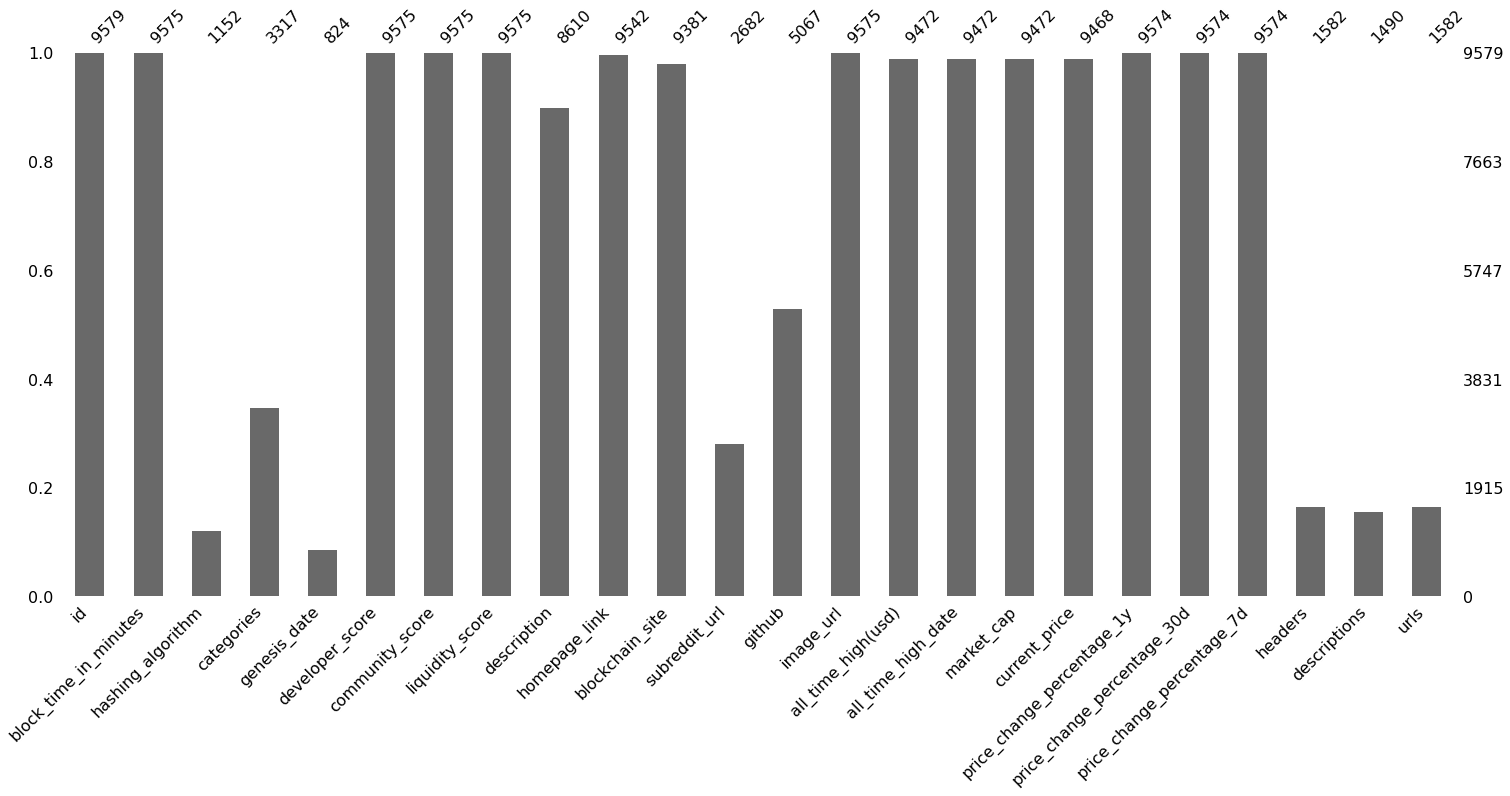

In [12]:
fig = msno.bar(coin_data)
fig_copy = fig.get_figure()
fig_copy.savefig('stats/missing_values_bar.png')

# Textual data

In [57]:
def getAvgWordCount(df, col_name):
    words_list = ["; ".join(ast.literal_eval(entry)) if type(entry) == str else [] for entry in df[col_name]]
    num_words_list = [len(entry.split()) if type(entry) == str else 0 for entry in df[col_name]]
    filtered_list = list(filter(lambda x: x > 0, num_words_list))
    return int(np.array(filtered_list).mean())

In [61]:
description = coin_data["description"]
num_words = [len(desc.split()) if type(desc) == str else 0 for desc in description]
avg_word_amount = int(np.array(num_words).mean())
print(f"The average amount of words in the description is {avg_word_amount}.")

The average amount of words in the description is 73.


In [59]:
avg_val = getAvgWordCount(coin_data, "descriptions")
print(f"The average amount of words in the articles is {avg_val}.")

The average amount of words in the articles is 54.


In [60]:
avg_header_count = getAvgWordCount(coin_data, "headers")
print(f"The average amount of words in the headers is {avg_header_count}.")

The average amount of words in the headers is 24.
